# Estados de Bell

### I.- Introducción
Los estados de Bell son un conjunto de 4 estados cuánticos de 2 qubits que representan los ejemplos más simples de entrelazamiento cuántico, los cuales además, se encuentran en un estado de superposición máxima. 

**Entrelazamiento:** En términos prácticos, y respecto  a lo que llegamos a observar experimentalmente, el entrelazamiento de dos qubits hace referencia a una correlación perfecta entre los resultados de las mediciones de 2 qubits, los cuales en principio deberían ser aleatorios e independientes. 

Por ejemplo, supongamos que tenemos dos observadores: Alice y Bob, los cuales se encuentran muy alejados de modo que no puedan influirse el uno al otro. Cada uno tiene uno de los qubits, que anteriormente han sido entrelazados. El qubit que Alice tiene puede ser tanto $|0⟩$ como $|1⟩$. Si Alice lo mide en la base estándar, el resultado será totalmente aleatorio, pero la probabilidad tanto de $|0⟩$ como de $|1⟩$ será de $\frac{1}{2}$. Si entonces Bob mide su qubit, el resultado será el mismo que el de Alice (la probabilidad, no el estado resultante). Sin embargo, si Alice y Bob se comunicaran, se encontrarían con que, a pesar de que sus resultados parezcan aleatorios, están perfectamente correlacionados.


Los 4 estados de Bell conforman la llamada base de Bell cuatridimensional del espacio de Hilbert para 2 qubits y son los siguientes:

\begin{align}
|\Phi^+\rangle &= \frac{1}{\sqrt{2}} (|00\rangle + |11\rangle) \\
|\Phi^-\rangle &= \frac{1}{\sqrt{2}} (|00\rangle - |11\rangle) \\
|\Psi^+\rangle &= \frac{1}{\sqrt{2}} (|01\rangle + |10\rangle) \\
|\Psi^-\rangle &= \frac{1}{\sqrt{2}} (|01\rangle - |10\rangle)
\end{align}



### II.- Creando estados de Bell mediante circuitos cuánticos

1. El primer estado de Bell, $|\Phi^+\rangle = \frac{1}{\sqrt{2}} (|00\rangle + |11\rangle)$ es fácil de implementar. Usaremos dos qubits, una compuerta Hadamard y una compuerta CNOT. A continuación mostramos un ejemplo.

In [2]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_state_qsphere
import numpy as np

El estado que queremos crear mediante un circuito cuantico es el siguiente:

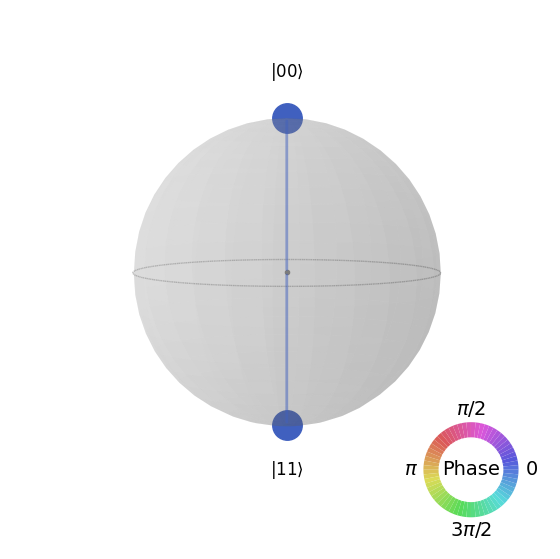

In [4]:
plot_state_qsphere((1/np.sqrt(2))*(Statevector.from_label('00') + Statevector.from_label('11')))

Así que empezamos con 2 qubits inicializados en $|0\rangle$, de modo que el estado inicial del sistema es:
$$|\psi_{0}\rangle= |00\rangle=\begin{bmatrix}
    1 \\
    0 \\
    0 \\
    0 \\
\end{bmatrix}
  $$
Ahora, aplicaremos una compuerta Hadamard al primer qubit. Para un sistema de 2 qubits, la matriz de Hadamard es:
$$
H\otimes I =\frac{1}{\sqrt{2}}\begin{bmatrix}
                              1 & 1 \\
                              1 & -1
                              \end{bmatrix}\otimes \begin{bmatrix}
    1 & 0 \\
    0 & 1
\end{bmatrix}
=\frac{1}{\sqrt{2}} \begin{bmatrix}
  1(1) & 1(0) & 1(1)&1(0)\\
   1(0)  & 1(1) & 1(0) & 1(1) \\
    1(1) & 1(0) &-1(1) &-1(0)\\
    1(0) & 1(1) & -1(0) & -1(1)
\end{bmatrix}
=\frac{1}{\sqrt{2}} \begin{bmatrix}
  1 & 0 & 1&0\\
   0  & 1 & 0 & 1 \\
    1 & 0 &-1 &0\\
    0 & 1 & 0 & -1
\end{bmatrix}
$$
Luego, despues de aplicar una compuerta Hadamard al primer qubit tenemos:

$$
\psi_{1}=\frac{1}{\sqrt{2}} \begin{bmatrix}
  1 & 0 & 1&0\\
   0  & 1 & 0 & 1 \\
    1 & 0 &-1 &0\\
    0 & 1 & 0 & -1
\end{bmatrix}\begin{bmatrix}
    1 \\
    0 \\
    0 \\
    0 \\
\end{bmatrix} = \frac{1}{\sqrt{2}} \begin{bmatrix}
    1 \\
    0 \\
    1 \\
    0 \\
\end{bmatrix}
$$

Ahora, solo aplicamos la compuerta CNOT:
$$
\psi_{2}= \begin{bmatrix}
  1 & 0 & 0&0\\
   0  & 1 & 0 & 0 \\
    0 & 0 &0 &1\\
    0 & 0 & 1 & 0
\end{bmatrix}
\frac{1}{\sqrt{2}}
\begin{bmatrix}
    1 \\
    0 \\
    1 \\
    0 \\
\end{bmatrix} = \frac{1}{\sqrt{2}} \begin{bmatrix}
    1 \\
    0 \\
    0 \\
    1 \\
\end{bmatrix}
$$

Obteniendo finalmente el estado:
$$
|\Phi^+\rangle = \frac{1}{\sqrt{2}} (|00\rangle + |11\rangle) 
$$

Ahora, podemos construir este circuito en qiskit.

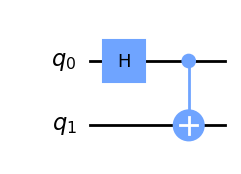

In [17]:
phi_plus = QuantumCircuit(2)
phi_plus.h(0)
phi_plus.cx(0,1)
phi_plus.draw("mpl")

Visualizando sus estados en la q-esfera

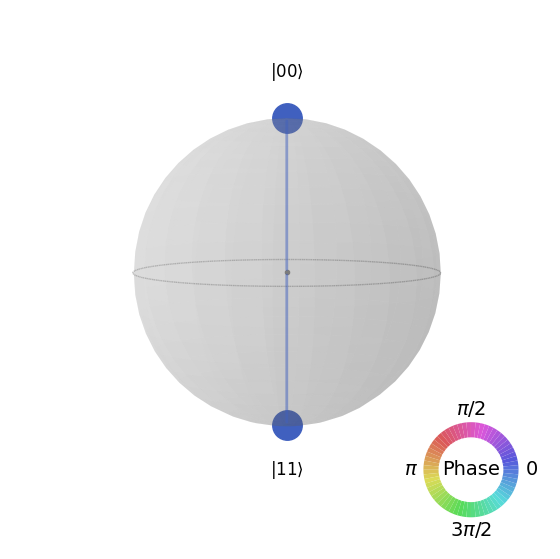

In [14]:
plot_state_qsphere(phi_plus)

Ahora podemos correr el circuito en el simulador:

In [3]:
from qiskit.visualization import plot_histogram
from qiskit import execute,Aer

Antes de ejecutar, medimos ambos qubits:

In [18]:
phi_plus.measure_all()

In [9]:
aer_sim=Aer.get_backend('aer_simulator')

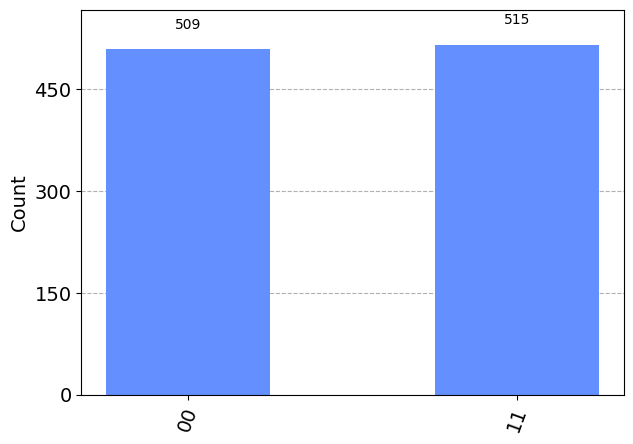

In [19]:
results=aer_sim.run(phi_plus).result()
answer=results.get_counts()

plot_histogram(answer)

Este histograma muestra los resultados que se obtendrían despues de medir dos qubits entrelazados, de forma independiente, repitiendo unas 1024 veces. Se puede observar una correlación perfecta entre los resultados de ambos qubits, es decir, si, por ejmplo Alice medía $|0\rangle$, Bob siempre medía $|0\rangle$ y si Alice medía $|1\rangle$, Bob medía $|1\rangle$.

2. De manera similar, para el segundo estado de Bell, $|\Phi^-\rangle = \frac{1}{\sqrt{2}} (|00\rangle - |11\rangle)$ debemos implementar el siguiente circuito cuantico:

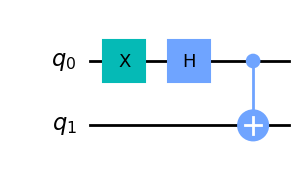

In [21]:
phi_minus=QuantumCircuit(2)
phi_minus.x(0)
phi_minus.h(0)
phi_minus.cx(0,1)
phi_minus.draw("mpl")

Podemos verficar el estado final en la q-esfera:

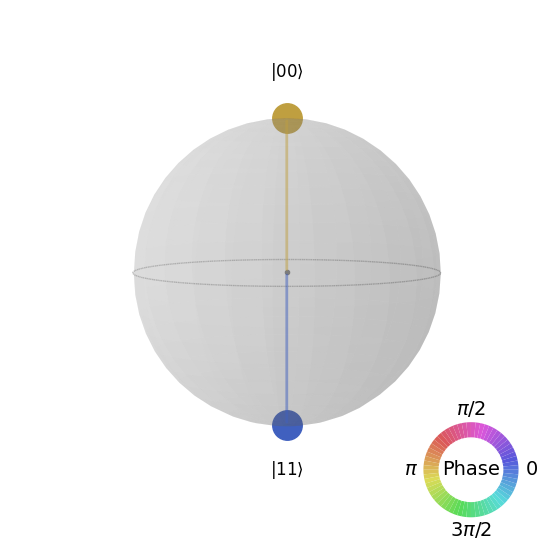

In [6]:
plot_state_qsphere(phi_minus)

Podemos observar que aunque la fase del estado $|00\rangle$ haya aumentado en $\pi$, las probabilidades de los estados siguen siendo las mismas que para $|\Phi^+\rangle$. Comprobaremos esto ejecutando el circuito en un simulador.

In [24]:
phi_minus.measure_all()

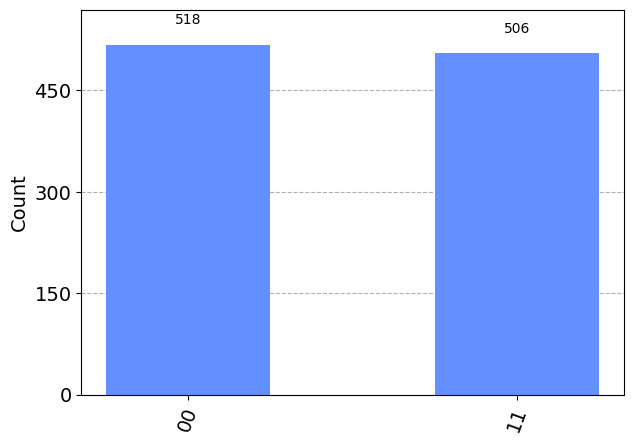

In [25]:
results=aer_sim.run(phi_minus).result()
answer=results.get_counts()
plot_histogram(answer)

3. Para el tercer estado , $|\Psi^+\rangle = \frac{1}{\sqrt{2}} (|01\rangle + |10\rangle) $ construimos el siguiente circuito:

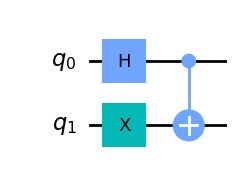

In [14]:
psi_plus=QuantumCircuit(2)
psi_plus.h(0)
psi_plus.x(1)
psi_plus.cx(0,1)
psi_plus.draw("mpl")

Cuyo estado final se visualiza en la q-esfera:

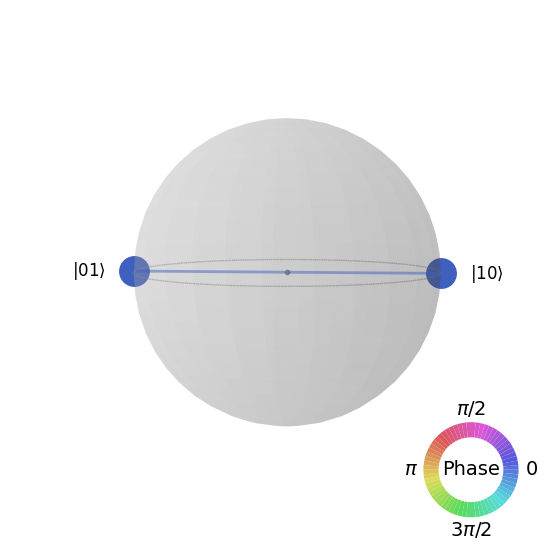

In [15]:
plot_state_qsphere(psi_plus)

Para ejecutar el circuito, medimos todos los qubits:

In [26]:
psi_plus.measure_all()

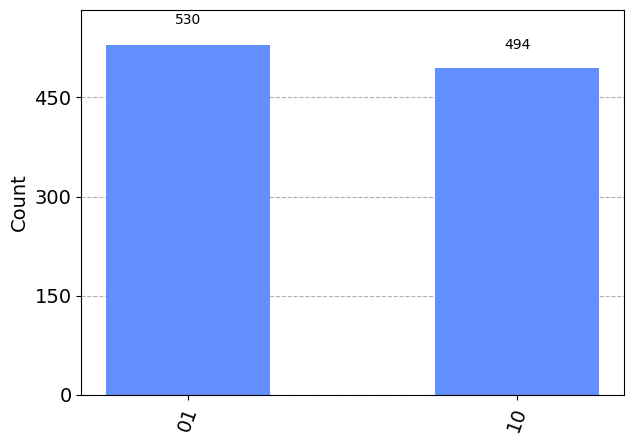

In [27]:
results=aer_sim.run(psi_plus).result()
answer=results.get_counts()
plot_histogram(answer)

4. Para el cuarto estado, $|\Psi^-\rangle = \frac{1}{\sqrt{2}} (|01\rangle - |10\rangle)$, podemos observar que es prácticamente el mismo que el tercer estado, pero con una fase negativa. Esto se consigue aplicando una compuerta Z a ambos qubits.

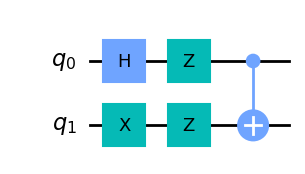

In [31]:
psi_minus=QuantumCircuit(2)
psi_minus.h(0)
psi_minus.x(1)
psi_minus.z([0,1])
psi_minus.cx(0,1)
psi_minus.draw("mpl")


El estado final en la q-esfera:

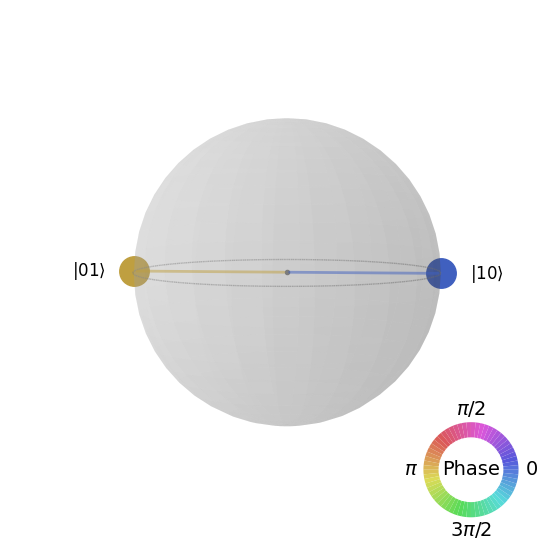

In [32]:
plot_state_qsphere(psi_minus)

Finalmente, ejecutamos el circuito, obteniendo:

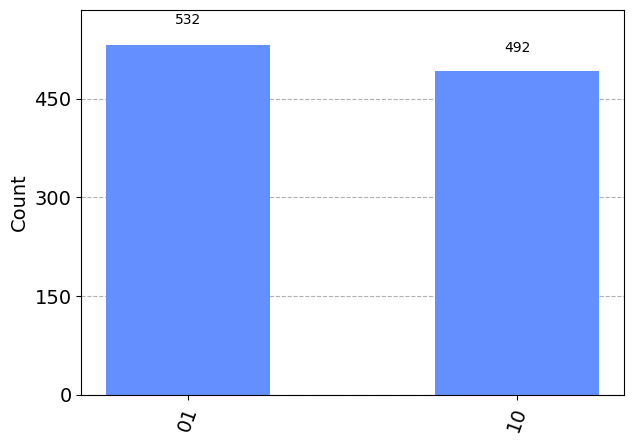

In [33]:
psi_minus.measure_all()
results=aer_sim.run(psi_plus).result()
answer=results.get_counts()
plot_histogram(answer)